In [17]:
Q4 = '''From the iris dataset, choose the 'petal length' and 'sepal width' for setosa and versicolor 
owers. Learn a
decision boundary for the two features using a single perceptron and SVM. Assume that all the weights of
the perceptron are initialized as 0 with the learning rate of 0.01. Draw the decision boundary.'''

In [18]:
from sklearn import datasets

In [19]:
irosdata = datasets.load_iris()#irisdatasets

In [20]:
type(irosdata)

sklearn.utils.Bunch

In [74]:
# irosdata

<h3>S.V.M. class </h3>

In [22]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 
from sklearn import svm







style.use('ggplot')
class SVM:
    def __init__(self,visualise = True):
        # super().__init__()
        self.visualise = visualise 
        self.colors = {1:'r',-1:'b'}
        if self.visualise:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
        self.w = None 
        self.b = None
        self.count1 = 0


    def fit(self,data):
        self.data = data  
        # save all magnitudeas as key and fin the minimum one 
        opt_dict = {}

        transofrm = [[1,1],
                        [-1,1],
                        [-1,-1],
                        [1,-1] ]
        all_data = []
        for yi in self.data:
        # for yi in range(len(self.data)):
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
            
        # print(all_data)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

                        
        #extremely expensive
        b_range_multiple = 5
        # b_range_multiple = 2


        b_multiple = 5

        latest_optimum = self.max_feature_value * 10

        for step in step_sizes :
            w = np.array([latest_optimum,latest_optimum])
            #we can do this
            optimised = False 


            while not optimised:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transofrm:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                self.count1+=1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimised = True
                else:
                    w = w - step


            norms = sorted([n for n in opt_dict])

            opt_choice = opt_dict[norms[0]]

            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2

    


    def predict(self,features):
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualise:
            self.ax.scatter(features[0],features[1],s = 200,marker = '*', c = self.colors[classification])

        return classification

    def visualifucse(self,data_dick1):
        [[self.ax.scatter(x[0],x[1],s= 100,color = self.colors[i]) for x in data_dick1[i]] for i in data_dick1]

        # v = x.w+b 
        # psv = 1 
        # nsv = -1
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9 , self.max_feature_value*1.1)

        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]


        #postive support vector
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],"k")


        #negative support vector
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],"k")


        zer1 = hyperplane(hyp_x_min,self.w,self.b,0)
        zer2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[zer1,zer2])


        plt.show()


In [ ]:
# CONVERTING DATA

In [23]:
# irosdata["feature_names"][0]

'sepal length (cm)'

In [24]:
irosdata
X = irosdata.data[:, :2]

In [75]:
# X

In [26]:
len(irosdata.data[:, 1:3])

150

In [27]:
irosdata.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
irosdata.feature_names.index('petal length (cm)')

2

In [29]:
irosdata.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
irosdata.feature_names.index('sepal width (cm)')

1

In [31]:
peta_data = irosdata.data[:, irosdata.feature_names.index('petal length (cm)')]

In [32]:
peta_data

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [33]:
sepa_data = irosdata.data[:, irosdata.feature_names.index('sepal width (cm)')]

In [34]:
#labels
irosdata['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [54]:
#features
irosdata.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
irosdata['target_names']#index 2 = 'virgininca' is not to be used

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
x1 = irosdata.data[0, 1:3]
x1l = x1.tolist()
x1l

In [39]:
#Creating dictionary to feed in S.V.M.
data_dict = {-1:[],1:[]} #-1 setosa 1 versicolor

<h3>CLASSIFICATION only between setosa and versicolor</h3>

In [40]:
#only classification between setosa versicolor


for i in range(len(irosdata.data[:, [irosdata.feature_names.index('petal length (cm)'),irosdata.feature_names.index('sepal width (cm)')]])):
#     print(i.tolist())
    x1 = irosdata.data[i, [irosdata.feature_names.index('petal length (cm)'),irosdata.feature_names.index('sepal width (cm)')]]
#     print(x1.tolist())
    if(irosdata['target'][i]==0):
        #0 for setosa
        data_dict[-1].append(x1.tolist())
        pass
    elif(irosdata['target'][i]==1):
        data_dict[1].append(x1.tolist())

        pass
    

In [41]:
# irosdata['target'][0]

0

In [42]:
len(data_dict[1])

50

<h3>Run S.V.M object </h3></br>
<h5>#the code will take lot of time to compile on CPU</h5>

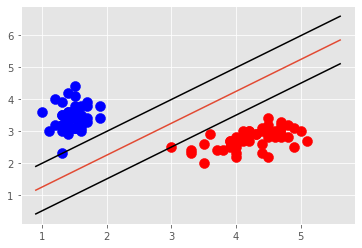

In [43]:
#the code will take lot of time to compile on CPU




svmobj = SVM()
svmobj.fit(data_dict)
svmobj.visualifucse(data_dict)

In [44]:
# X = [[-1,-3],[0,-1],[-1,-2],[1,-2],[2,2],[-1,2],[1,3],[-1,-1]]
# y = [0,0,0,0 ,1,1,1,1]
# clf = svm.SVC(kernel = 'linear')
# clf.fit(X, y)

In [77]:
print("SVM weights  ",svmobj.w)
print("SVM bias  ",svmobj.b)

SVM weights   [ 1.3413 -1.3413]
SVM bias   0.3315000000009789


In [46]:
# out_piutindex = []
# data_index = []

In [47]:
data_index = irosdata.data[:, [irosdata.feature_names.index('petal length (cm)'),irosdata.feature_names.index('sepal width (cm)')]].tolist()

In [48]:
# len(data_index)

150

In [49]:
# for i in irosdata['target']:
#     out_piutindex.append(i.tolist())
    

<h1>Perceptron </h1>

In [50]:
# Learning Rate = 0.01 initial weights = [0,0,0]

In [69]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 


style.use('ggplot')




def flatten(seq):
  for el in seq:
    if isinstance(el, list):
      yield from flatten(el)
    else:
      yield el






class PerceptronManual(object):
    def __init__(self,traindata,random1 = True,*args):

#         self.colors = {1:'r',-1:'b'}
        intial_weight = 0.0
        self.nptraindata = np.array(traindata)
        self.weights = [intial_weight for i in range(len(traindata[0]))]
        self.traindata = traindata
        if random1 == False:
            self.weights = [random.randint(1,100) for i in range(len(traindata[0]))]
#             self.a = args[0]
#             self.b = args[1]
#             print(self.a)
#             print(self.b)

        #visualise
       
            
        
        
        pass

    
    def initdraw(self,data1):
        get_label = np.unique([i[-1] for i in data1])
        self.colors= {}
        if len(get_label)!=2:
            self.visualise = None#if two categories
        else:
            self.colors[get_label[0]] = 'r'
            self.colors[get_label[1]] = 'b'
            
            pass 
        if self.visualise is not None:
            xaxis = list(self.nptraindata[:,0])
            yaxis = list(self.nptraindata[:,1])
            label1 = list(self.nptraindata[:,2])
#             if data1:
#             print(xaxis)
#             print(yaxis)
#             print(self.colors)
            for ivar in range(len(label1)):
                self.ax.scatter(xaxis[ivar],yaxis[ivar],s = 200,marker = '*', c = self.colors[label1[ivar]])
                pass
            
        pass 
        

    def predict(self,data1,weightstemp):
        activation  = weightstemp[0]
        for i in range(len(data1)-1):
            activation += weightstemp[i+1]*data1[i]

               
            
            
        return 1.0 if activation>=0 else 0.0
        pass 

        
    def train_weights(self,l_rate,n_epoch):#tain data,learning data,epochs
#         intial_weight = 0.0
#         weights = [intial_weight for i in range(len(train[0]))]
        self.iteration = 0
        for epocvar in range(n_epoch):
            sum_error_var =  0.0
            for row in self.traindata:
                prediction = self.predict(row,self.weights)
                error_pre = row[-1]-prediction
                sum_error_var+=error_pre**2
                self.weights[0] = self.weights[0] + l_rate*error_pre
                for ivar in range(len(row)-1):
                    self.weights[ivar+1] = self.weights[ivar+1] +(l_rate*error_pre*row[ivar])

            if sum_error_var!=0:
                self.iteration+=1
                pass
            print("->Epoch = {:d},learning_rate = {:.3f},error = {:.3f}".format(epocvar,l_rate,sum_error_var))
            print("Weights ",self.weights)
        return self.weights 
        
    def done(self,weightstemp):
        self.visualise = None
        if len(self.traindata[0])==3:
            self.visualise = True
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            self.initdraw(self.traindata)
         #plt line
        data1 = self.traindata
        if self.visualise is not None and len(weightstemp)==3:
            max_feature_value = (max(flatten(data1)))*1.1
            min_feature_value = (min(flatten(data1)))*0.9
            def hyperplane(x,w,b,v):
                return (-w[0]*x-b+v) / w[1]
            zer1 = hyperplane(min_feature_value,weightstemp[1:],weightstemp[0],0)
            zer2 = hyperplane(max_feature_value,weightstemp[1:],weightstemp[0],0)
            self.ax.plot([min_feature_value,max_feature_value],[zer1,zer2])
            plt.show()
            pass

In [1]:
# irosdata["feature_names"][0]

In [52]:
target_data = irosdata.target

In [78]:
# target_data

<h5>No Virginica in classification</h5>

In [55]:
#get value of virginica and to remove from target_data
valueofidex = np.where(irosdata['target_names']=='virginica')

In [79]:
result_dex = np.where(irosdata.target==valueofidex[0])#remove
result_dex
#remove index of virginica data

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], dtype=int64),)

In [80]:
#remove virginica data
new_target_data = np.delete(target_data,result_dex)
# new_target_data(new label set)

In [64]:
 #only two features to use 'petal length (cm)' /'sepal width (cm)'

petallenidex = irosdata.feature_names.index('petal length (cm)')
sepawididex = irosdata.feature_names.index('sepal width (cm)')
bothdata = irosdata.data[:, [petallenidex,sepawididex] ]
# bothdata
# remove data of virgincia
new_bothdata = np.delete(bothdata,result_dex,axis = 0)
# new_bothdata

In [67]:
#combine features and label to feed into perceptron
dataset_comb = np.column_stack((new_bothdata,new_target_data))
dataset_comb_list = dataset_comb.tolist()
# len(dataset_comb_list)
# dataset_comb_list

100

In [ ]:
# Create Perceptron object

In [70]:
obkect = PerceptronManual(dataset_comb_list)

In [ ]:
#initial weights to 0 and learning rate = 0.01

In [71]:
#training
finalweights = obkect.train_weights(0.01,42)#learning rate = 0.01 and epochs = 42

->Epoch = 0,learning_rate = 0.010,error = 2.000
Weights  [0.0, 0.033, -0.0030000000000000027]
->Epoch = 1,learning_rate = 0.010,error = 2.000
Weights  [0.0, 0.066, -0.006000000000000005]
->Epoch = 2,learning_rate = 0.010,error = 1.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 3,learning_rate = 0.010,error = 0.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 4,learning_rate = 0.010,error = 0.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 5,learning_rate = 0.010,error = 0.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 6,learning_rate = 0.010,error = 0.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 7,learning_rate = 0.010,error = 0.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 8,learning_rate = 0.010,error = 0.000
Weights  [-0.01, 0.052000000000000005, -0.04100000000000001]
->Epoch = 9,learning_rate = 0.010,error = 0.000
We

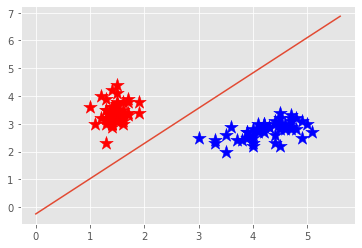

In [72]:
obkect.done(finalweights)

In [81]:
print("The number of iterations for convegence of weights ",obkect.iteration)

The number of iterations for convegence of weights  3


In [73]:
for row in dataset_comb_list:
    prediction = obkect.predict(row, finalweights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Pred